# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [15]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The entire booking and ticke...
1,Not Verified | British Airways cancelled my ...
2,Not Verified | I wanted to write this review s...
3,✅ Trip Verified | Check in fast and friendly....
4,✅ Trip Verified | This is the first time I ha...


In [16]:
import os

# Get the current working directory
current_path = os.getcwd()

# Print the current working directory
print("Current working directory:", current_path)


Current working directory: /content


In [17]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path where you want to save the CSV file
file_path = '/content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/BA_reviews.csv'

# Save the DataFrame to CSV
df.to_csv(file_path, index=False)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [19]:
# Load the dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/BA_reviews.csv")

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())

Original Dataset:
                                             reviews
0  ✅ Trip Verified | The entire booking and ticke...
1  Not Verified |   British Airways cancelled my ...
2  Not Verified | I wanted to write this review s...
3  ✅ Trip Verified |  Check in fast and friendly....
4  ✅ Trip Verified |  This is the first time I ha...


In [21]:
import pandas as pd
import re

In [22]:
# 1. Remove unnecessary text from each review
df["reviews"] = df["reviews"].str.replace("✅ Trip Verified", "")
# You can add more text patterns to remove if needed

# 2. Convert all text to lowercase
df["reviews"] = df["reviews"].str.lower()

# 3. Remove punctuation
df["reviews"] = df["reviews"].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# 4. Remove numbers
df["reviews"] = df["reviews"].apply(lambda x: re.sub(r'\d+', '', x))

# 5. Remove extra whitespaces
df["reviews"] = df["reviews"].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())

# Save the cleaned dataset
cleaned_file_path = '/content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/cleaned_BA_reviews.csv'
df.to_csv(cleaned_file_path, index=False)

print("\nDataset has been cleaned and saved to:", cleaned_file_path)


Cleaned Dataset:
                                             reviews
0  the entire booking and ticketing experience ha...
1  not verified british airways cancelled my flig...
2  not verified i wanted to write this review so ...
3  check in fast and friendly security a breeze l...
4  this is the first time i have seen the new clu...

Dataset has been cleaned and saved to: /content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/cleaned_BA_reviews.csv


In [26]:
import nltk
nltk.download('all')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

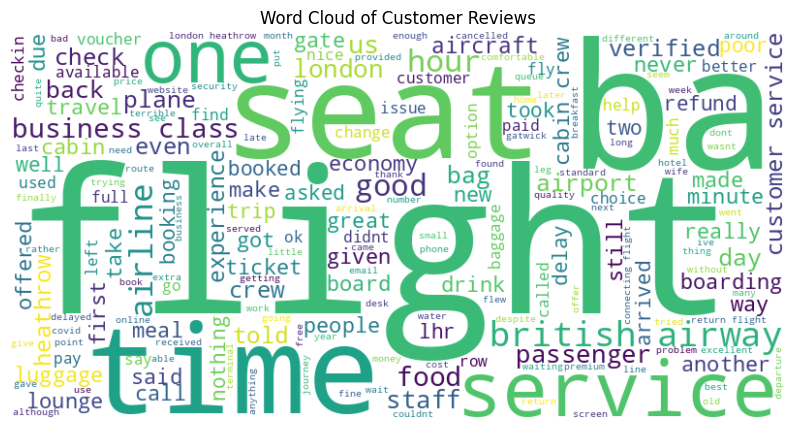

Top 10 words for Topic 1:
['flights', 'service', 'airport', 'london', 'airways', 'british', 'luggage', 'hours', 'ba', 'flight']
Top 10 words for Topic 2:
['airline', 'hours', 'told', 'airways', 'british', 'london', 'customer', 'service', 'ba', 'flight']
Top 10 words for Topic 3:
['boarding', 'gate', 'check', 'crew', 'service', 'cabin', 'time', 'staff', 'ba', 'flight']
Top 10 words for Topic 4:
['food', 'boarding', 'service', 'cabin', 'passengers', 'good', 'time', 'crew', 'ba', 'flight']
Top 10 words for Topic 5:
['economy', 'good', 'service', 'seats', 'food', 'ba', 'flight', 'business', 'seat', 'class']


In [37]:
# Load the dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/cleaned_BA_reviews.csv")

# Tokenize words
df['tokenized_reviews'] = df['reviews'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['filtered_reviews'] = df['tokenized_reviews'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Join words back into sentences
df['cleaned_reviews'] = df['filtered_reviews'].apply(lambda x: ' '.join(x))

# Topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['cleaned_reviews'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_reviews']))

# Sentiment analysis
# Add your sentiment analysis code here if needed

# Visualize word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Customer Reviews')
plt.axis('off')
plt.show()

# Display topics
for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic {index+1}:')
    feature_names = vectorizer.get_feature_names_out()
    top_words_indices = topic.argsort()[-10:]
    top_words = [feature_names[i] for i in top_words_indices]
    print(top_words)



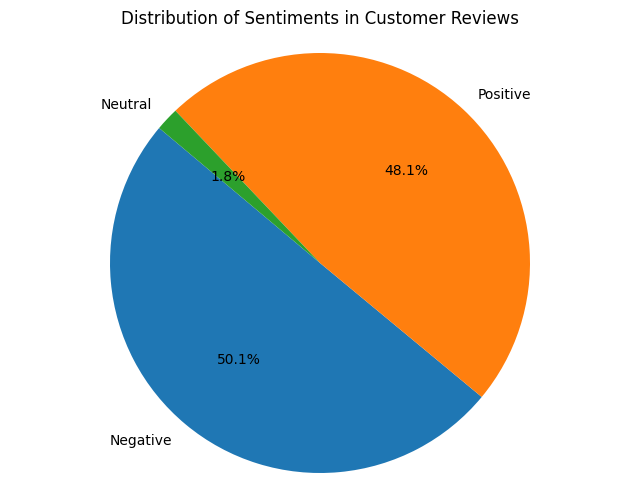

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/cleaned_BA_reviews.csv")

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    sentiment = sid.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to each review
df['sentiment_score'] = df['reviews'].apply(get_sentiment_score)

# Categorize sentiments
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(categorize_sentiment)

# Calculate percentage of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments in Customer Reviews')
plt.axis('equal')
plt.show()


In [41]:
# Count the number of reviews in each sentiment category
sentiment_counts_val = df['sentiment_category'].value_counts()

# Print the summary
print(f"From cleaning {len(df)} reviews given by the customers, we obtained:")
print("Positive Reviews -", sentiment_counts_val['Positive'])
print("Negative Reviews -", sentiment_counts_val['Negative'])
print("Neutral Reviews -", sentiment_counts_val['Neutral'])


From cleaning 1000 reviews given by the customers, we obtained:
Positive Reviews - 481
Negative Reviews - 501
Neutral Reviews - 18


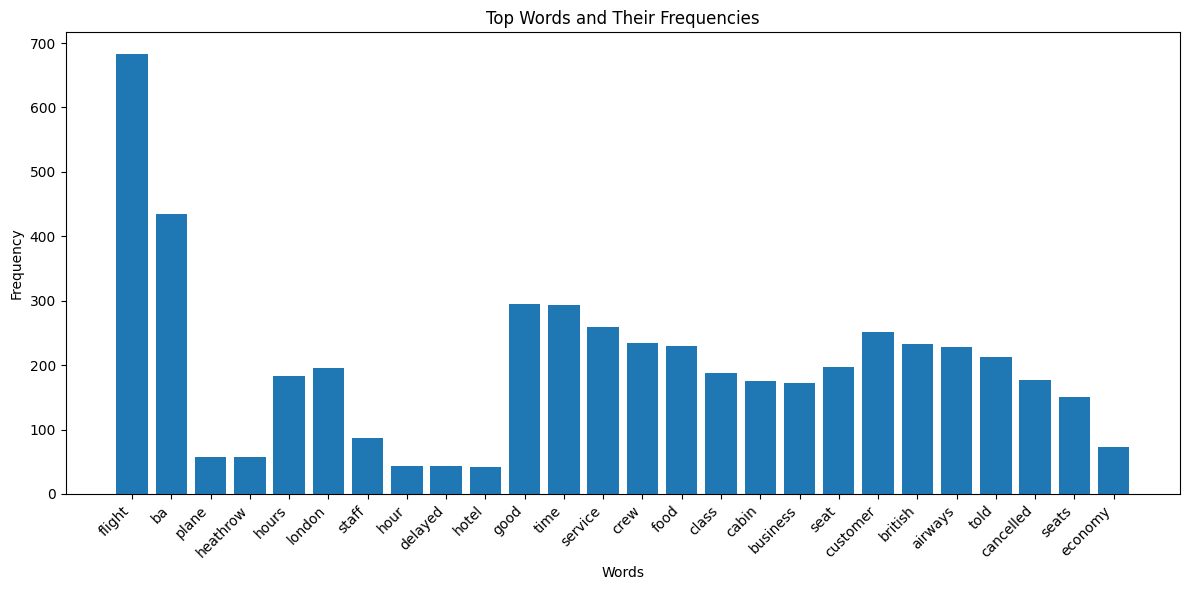

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the cleaned dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Projects/dataSet/cleaned_BA_reviews.csv")

# Tokenize words
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['reviews'])

# Perform topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Initialize lists to store words and their corresponding frequencies
words = []
frequencies = []

# Extract top words and their frequencies
for topic in lda.components_:
    topic_words = [(feature_names[i], topic[i]) for i in topic.argsort()[::-1][:10]]
    for word, freq in topic_words:
        words.append(word)
        frequencies.append(freq)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
